<!-- # Regresión Lineal Univariada -->

In [ ]:
# Descomentar para instalar libreria.

# !pip install statsmodels

# Regresión Lineal Univariada - Usando 'OverallQual' para predecir 'SalePrice'

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [11]:

# Cargar el dataset
df = pd.read_csv("train.csv")  # Asegúrate de que el archivo está en la misma carpeta del notebook

# Eliminar columnas con un alto número de valores nulos (>40%)
missing_percentage = df.isnull().sum() / len(df)
columns_to_drop = missing_percentage[missing_percentage > 0.4].index.tolist()
df = df.drop(columns=columns_to_drop)

# Imputación de valores nulos para columnas restantes (rellenar con la mediana para valores numéricos)
df = df.fillna(df.median(numeric_only=True))

# Ver las primeras filas para verificar que la carga fue correcta
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
# Seleccionar la variable predictora
X = df[['OverallQual']]
y = df['SalePrice']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("----------------- X train ----------------- \n", X_train)
print("----------------- X test ----------------- \n", X_test)
print("----------------- Y train ----------------- \n", y_train)
print("----------------- Y test ----------------- \n", y_test)

----------------- X train ----------------- 
       OverallQual
254             5
1066            6
638             5
799             5
380             5
...           ...
1095            6
1130            4
1294            5
860             7
1126            7

[1168 rows x 1 columns]
----------------- X test ----------------- 
       OverallQual
892             6
1105            8
413             5
522             6
1036            9
...           ...
479             4
1361            7
802             7
651             4
722             4

[292 rows x 1 columns]
----------------- Y train ----------------- 
 254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64
----------------- Y test ----------------- 
 892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
802     

In [14]:
# Ajustar el modelo
lin_reg_uni = LinearRegression()
lin_reg_uni.fit(X_train, y_train)

# Predicciones
y_train_pred = lin_reg_uni.predict(X_train)
y_test_pred = lin_reg_uni.predict(X_test)


In [15]:

# Evaluación del modelo
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Imprimir métricas
print(f"RMSE (train): {train_rmse}")
print(f"RMSE (test): {test_rmse}")
print(f"R² (train): {train_r2}")
print(f"R² (test): {test_r2}")


RMSE (train): 47789.62867359155
RMSE (test): 51778.62651238531
R² (train): 0.6170962665508342
R² (test): 0.6504677778896863


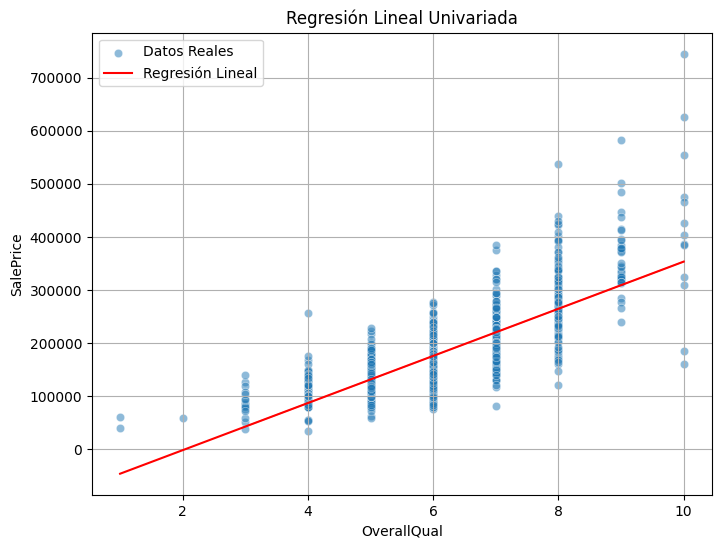

In [16]:

# Gráfico de regresión
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train['OverallQual'], y=y_train, alpha=0.5, label="Datos Reales")
sns.lineplot(x=X_train['OverallQual'], y=y_train_pred, color='red', label="Regresión Lineal")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("Regresión Lineal Univariada")
plt.legend()
plt.grid(True)
plt.show()